In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import geopandas as gpd

import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx

sns.set(font='Arial')



c:\Users\mmak\Anaconda3\envs\geo_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ct = gpd.read_file(r"../geo/lct_000b16a_e.zip")
cal_ct = ct[ct['CMANAME']=='Calgary']

In [3]:
starts_ct_ann=pd.read_csv('./Annual/starts_ct_type_a.csv')

In [4]:
starts_ct_ann=starts_ct_ann[starts_ct_ann['metro']=='CALGARY']

In [5]:
starts_ct_ann['full_ct']=starts_ct_ann['full_ct'].map('{:.2f}'.format)
starts_ct_ann['full_ct']=starts_ct_ann['full_ct'].astype(str)

In [6]:
cal_ct

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
521,8250204.03,0204.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4721866.774 1923999.814, 4721366.451..."
565,8250201.01,0201.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4681607.283 1950607.369, 4681725.897..."
574,8250201.02,0201.02,48,Alberta,825,48825,Calgary,B,"POLYGON ((4666222.751 1976893.989, 4666543.574..."
576,8250200.03,0200.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4653424.837 1948201.417, 4653641.457..."
577,8250204.01,0204.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4710210.854 1899299.514, 4710469.103..."
...,...,...,...,...,...,...,...,...,...
5580,8250001.29,0001.29,48,Alberta,825,48825,Calgary,B,"POLYGON ((4679927.134 1909070.640, 4679982.283..."
5598,8250076.09,0076.09,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689528.946 1930653.354, 4689505.157..."
5599,8250076.12,0076.12,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689957.211 1933804.917, 4690002.617..."
5600,8250076.13,0076.13,48,Alberta,825,48825,Calgary,B,"POLYGON ((4686841.946 1937701.051, 4686829.877..."


In [7]:
starts_metro_type = pd.read_csv('./Annual/starts_metro_type_a.csv')

In [8]:
starts_metro_type=starts_metro_type[starts_metro_type['metro']=='CALGARY']

In [9]:
starts_metro_type

,Unnamed: 0,reference_period_qq,metcode,dweltype,mkttycd,date_pbi,metro,total_starts,starts_no_accsuite,starts_accsuite,...,tot_units,total_avg_unitsize_sqm,total_avg_unitsize_sqft,total_avg_price,total_min_price,total_max_price,ref_yy,ref_qq,population,starts_per_10kpop
9,10,1988-3,140,1,1,"September 30, 1988",CALGARY,920,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1988,3,719616.558,12.784586
26,27,1988-4,140,2,2,"December 31, 1988",CALGARY,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1988,4,724449.865,0.027607
40,41,1989-1,140,1,1,"March 31, 1989",CALGARY,785,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,729550.383,10.760052
83,84,1989-3,140,1,0,"September 30, 1989",CALGARY,346,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1989,3,742152.045,4.662117
84,85,1989-3,140,2,0,"September 30, 1989",CALGARY,18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1989,3,742152.045,0.242538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13026,13027,2023-2,140,1,3,"June 30, 2023",CALGARY,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023,2,1653810.000,0.060466
13027,13028,2023-2,140,2,1,"June 30, 2023",CALGARY,420,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023,2,1653810.000,2.539590
13028,13029,2023-2,140,4,1,"June 30, 2023",CALGARY,435,NaN,NaN,...,123.0,99.394553,1069.873027,290120.577236,0.0,737000.0,2023,2,1653810.000,2.630290
13029,13030,2023-2,140,5,2,"June 30, 2023",CALGARY,1115,968.0,147.0,...,3.0,131.796667,1418.646140,563855.666667,556895.0,577607.0,2023,2,1653810.000,6.742008


In [10]:
comp_metro = pd.read_csv('./Annual/comp_metro_a.csv')
comp_metro=comp_metro[comp_metro['metro']=='CALGARY']

In [11]:
comp_metro=comp_metro.drop(columns=['metcode','date_pbi','ref_qq'])
comp_metro.set_index('ref_yy',inplace=True)

In [12]:
comp_metro

,Unnamed: 0,metro,total_completions,completions_no_accsuite,completions_accsuite,num_structures,unitsperstructure,avgstorycount,avglengthofconstr,avgpermit_to_start_time,population,comp_per_10kpop
ref_yy,,,,,,,,,,,,
1988,1,CALGARY,2480,NaN,NaN,2122,1.168709,0.019793,5.763238,0.765316,724449.865,34.232873
1989,4,CALGARY,5014,NaN,NaN,4697,1.067490,0.001490,4.482086,0.419417,747414.603,67.084587
1990,7,CALGARY,7509,NaN,NaN,6765,1.109978,0.000000,4.909709,0.371352,764404.198,98.233369
1991,10,CALGARY,5065,NaN,NaN,4204,1.204805,0.004044,4.766713,0.388294,779040.068,65.015911
1992,13,CALGARY,6509,NaN,NaN,5858,1.111130,0.000000,4.806935,0.204507,789289.723,82.466549
1993,16,CALGARY,6286,NaN,NaN,5486,1.145826,0.000000,4.513857,0.239336,803617.450,78.221298
1994,19,CALGARY,6823,NaN,NaN,5903,1.155853,0.000000,4.761320,0.311367,820531.899,83.153379
1995,22,CALGARY,5674,NaN,NaN,4493,1.262853,0.000000,5.184868,0.282884,839716.198,67.570448
1996,25,CALGARY,6781,NaN,NaN,5636,1.203158,0.000000,5.160087,0.394961,867371.684,78.178711


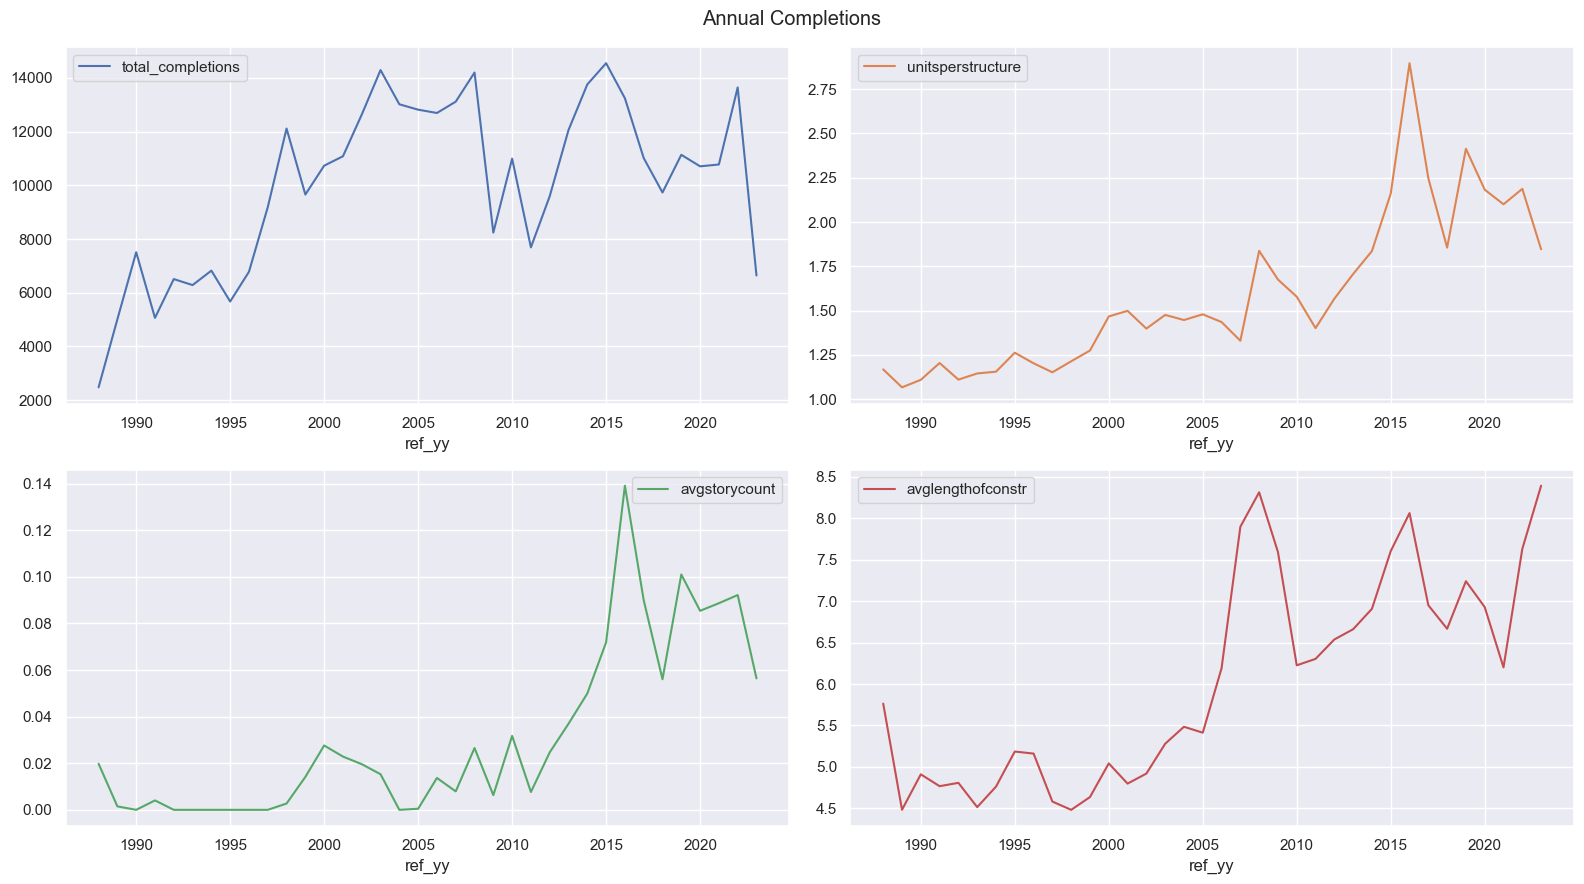

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,9))

comp_metro[['total_completions','unitsperstructure','avgstorycount','avglengthofconstr']].plot(ax= axes,subplots=True, title = 'Annual Completions')
plt.tight_layout()


<AxesSubplot:title={'center':'comp_per_10kpop'}, xlabel='ref_yy'>

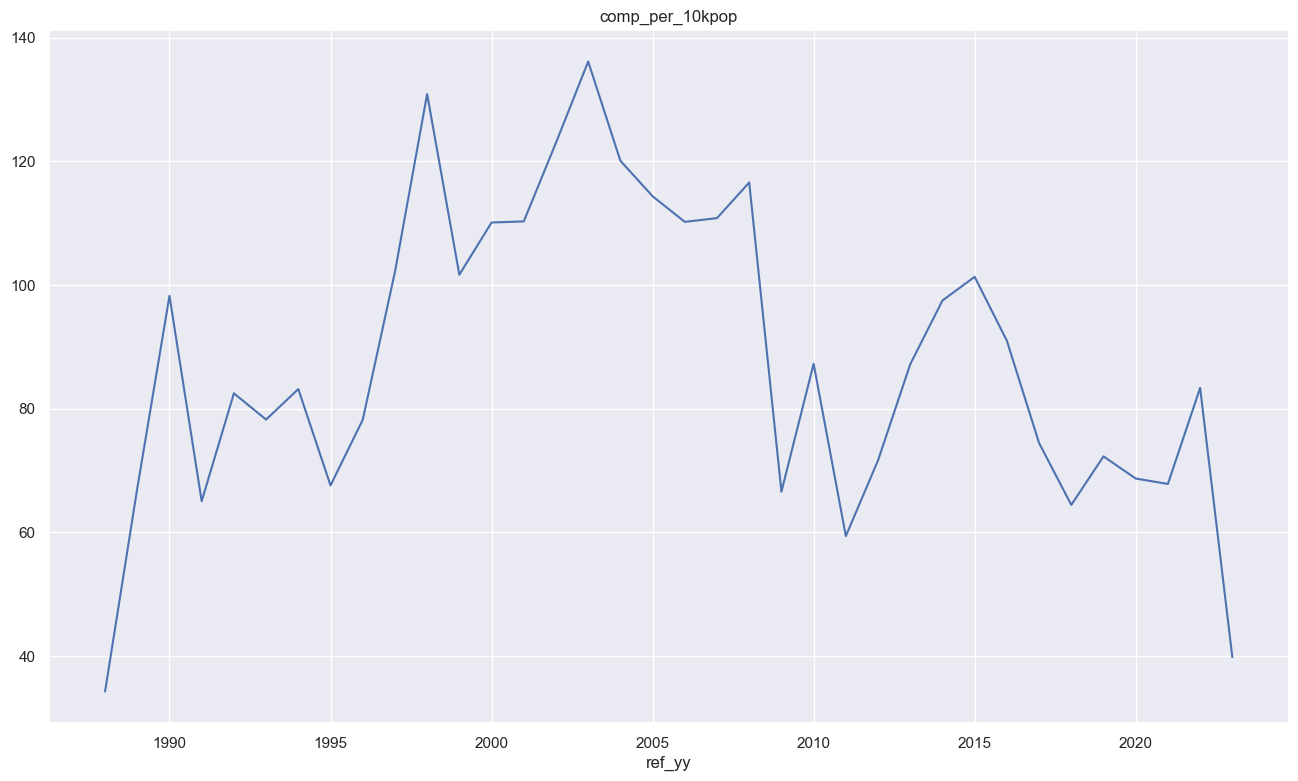

In [14]:
comp_metro['comp_per_10kpop'].plot(figsize=(16,9),title = 'comp_per_10kpop')

In [15]:
comp_metro_type=pd.read_csv('./Annual/comp_metro_type_a.csv')
comp_metro_type=comp_metro_type[comp_metro_type['metro']=='CALGARY']

In [16]:
comp_metro_type.columns

Index(['Unnamed: 0', 'ref_yy', 'metcode', 'dweltype', 'mkttycd', 'date_pbi',
       'metro', 'total_completions', 'completions_no_accsuite',
       'completions_accsuite', 'num_structures', 'unitsperstructure',
       'avgstorycount', 'avglengthofconstr', 'avgpermit_to_start_time',
       'bachelor_units', 'one_bedrooms', 'two_bedrooms', 'three_bedrooms',
       'four_bedrooms', 'tot_units', 'total_avg_unitsize_sqm',
       'total_avg_unitsize_sqft', 'total_avg_price', 'total_min_price',
       'total_max_price', 'ref_qq', 'population', 'comp_per_10kpop'],
      dtype='object')

In [17]:
comp_metro_type=comp_metro_type.drop(columns=['metcode','date_pbi','ref_qq'])


In [18]:
comp_metro_type

,Unnamed: 0,ref_yy,dweltype,mkttycd,metro,total_completions,completions_no_accsuite,completions_accsuite,num_structures,unitsperstructure,...,three_bedrooms,four_bedrooms,tot_units,total_avg_unitsize_sqm,total_avg_unitsize_sqft,total_avg_price,total_min_price,total_max_price,population,comp_per_10kpop
0,1,1988,1,1,CALGARY,2018,NaN,NaN,2018,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,27.855620
1,2,1988,4,1,CALGARY,102,NaN,NaN,8,12.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,1.407965
44,45,1989,1,1,CALGARY,4497,NaN,NaN,4497,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747414.603,60.167409
97,98,1990,1,3,CALGARY,2,NaN,NaN,2,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764404.198,0.026164
98,99,1990,2,3,CALGARY,148,NaN,NaN,74,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764404.198,1.936148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,4277,2023,2,3,CALGARY,30,NaN,NaN,15,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1668861.000,0.179763
4277,4278,2023,4,1,CALGARY,473,NaN,NaN,103,4.592233,...,308.0,14.0,364.0,103.456319,1113.593469,464538.898352,322300.0,695000.0,1668861.000,2.834268
4278,4279,2023,4,2,CALGARY,91,NaN,NaN,20,4.550000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1668861.000,0.545282
4279,4280,2023,5,2,CALGARY,1205,900.0,305.0,284,4.242958,...,11.0,NaN,11.0,127.950000,1377.241005,497490.636364,406471.0,552589.0,1668861.000,7.220493


In [19]:
DWELTYPE={1:'Single-detached',
2:'Semi-detached',
4:'Row/Townhouse',
5:'Apartment'}


In [20]:
MKTTYCD	={1:'Homeowner',
2:'Rental',
3:'Condo',
4:'Coop'
}

In [21]:
comp_metro_type['dweltype']=comp_metro_type['dweltype'].map(DWELTYPE)
comp_metro_type['mkttycd']=comp_metro_type['mkttycd'].map(MKTTYCD)

In [22]:
comp_single = comp_metro_type[comp_metro_type['dweltype']=='Single-detached']
comp_semi = comp_metro_type[comp_metro_type['dweltype']=='Semi-detached']

comp_row = comp_metro_type[comp_metro_type['dweltype']=='Row/Townhouse']
comp_apt = comp_metro_type[comp_metro_type['dweltype']=='Apartment']



In [23]:
comp_single.pivot(index='ref_yy',columns='mkttycd')

Unnamed: 0                           dweltype                   \
mkttycd      Condo Homeowner  Rental            Condo        Homeowner   
ref_yy                                                                   
1988           NaN       1.0     NaN              NaN  Single-detached   
1989           NaN      45.0  1677.0              NaN  Single-detached   
1990          98.0    1759.0  1760.0  Single-detached  Single-detached   
1991           NaN    1849.0     NaN              NaN  Single-detached   
1992           NaN     190.0   191.0              NaN  Single-detached   
1993        2001.0    2000.0     NaN  Single-detached  Single-detached   
1994        2079.0     293.0     NaN  Single-detached  Single-detached   
1995           NaN     327.0     NaN              NaN  Single-detached   
1996        2232.0     372.0     NaN  Single-detached  Single-detached   
1997        2302.0     407.0     NaN  Single-detached  Single-detached   
1998        2382.0    2381.0     NaN  Single-detached  Single-detached   
1999        2462.0     481.0     NaN  Single-detached  Single-detached   
2000        2527.0    2525.0  2526.0  Single-detached  Single-detached   
2001        2602.0    2600.0  2601.0  Single-detached  Single-detached   
2002         616.0    2671.0     NaN  Single-detached  Single-detached   
2003         668.0    2736.0     NaN  Single-detached  Single-detached   
2004         718.0    2805.0     NaN  Single-detached  Single-detached   
2005        2876.0    2875.0     NaN  Single-detached  Single-detached   
2006        2955.0    2954.0     NaN  Single-detached  Single-detached   
2007        3028.0     862.0     NaN  Single-detached  Single-detached   
2008        3105.0    3104.0     NaN  Single-detached  Single-detached   
2009           NaN     949.0     NaN              NaN  Single-detached   
2010           NaN     995.0     NaN              NaN  Single-detached   
2011           NaN    1040.0     NaN              NaN  Single-detached   
2012           NaN    3385.0     NaN              NaN  Single-detached   
2013        3472.0    3471.0     NaN  Single-detached  Single-detached   
2014        1171.0    1170.0     NaN  Single-detached  Single-detached   
2015           NaN    3644.0  3645.0              NaN  Single-detached   
2016        3734.0    3733.0  1238.0  Single-detached  Single-detached   
2017        3813.0    1285.0  3812.0  Single-detached  Single-detached   
2018           NaN    3890.0  3891.0              NaN  Single-detached   
2019        3964.0    1383.0  3963.0  Single-detached  Single-detached   
2020           NaN    4041.0  1430.0              NaN  Single-detached   
2021        4120.0    1476.0  4119.0  Single-detached  Single-detached   
2022        4199.0    1524.0  4198.0  Single-detached  Single-detached   
2023        1570.0    1568.0  1569.0  Single-detached  Single-detached   

                            metro                    total_completions  ...  \
mkttycd           Rental    Condo Homeowner   Rental             Condo  ...   
ref_yy                                                                  ...   
1988                 NaN      NaN   CALGARY      NaN               NaN  ...   
1989     Single-detached      NaN   CALGARY  CALGARY               NaN  ...   
1990     Single-detached  CALGARY   CALGARY  CALGARY               2.0  ...   
1991                 NaN      NaN   CALGARY      NaN               NaN  ...   
1992     Single-detached      NaN   CALGARY  CALGARY               NaN  ...   
1993                 NaN  CALGARY   CALGARY      NaN              16.0  ...   
1994                 NaN  CALGARY   CALGARY      NaN               1.0  ...   
1995                 NaN      NaN   CALGARY      NaN               NaN  ...   
1996                 NaN  CALGARY   CALGARY      NaN               3.0  ...   
1997                 NaN  CALGARY   CALGARY      NaN              21.0  ...   
1998                 NaN  CALGARY   CALGARY      NaN              27.0  ...   
1999           

In [24]:
comp_single

,Unnamed: 0,ref_yy,dweltype,mkttycd,metro,total_completions,completions_no_accsuite,completions_accsuite,num_structures,unitsperstructure,...,three_bedrooms,four_bedrooms,tot_units,total_avg_unitsize_sqm,total_avg_unitsize_sqft,total_avg_price,total_min_price,total_max_price,population,comp_per_10kpop
0,1,1988,Single-detached,Homeowner,CALGARY,2018,NaN,NaN,2018,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724449.865,27.855620
44,45,1989,Single-detached,Homeowner,CALGARY,4497,NaN,NaN,4497,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747414.603,60.167409
97,98,1990,Single-detached,Condo,CALGARY,2,NaN,NaN,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764404.198,0.026164
189,190,1992,Single-detached,Homeowner,CALGARY,5561,NaN,NaN,5561,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789289.723,70.455751
190,191,1992,Single-detached,Rental,CALGARY,3,NaN,NaN,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789289.723,0.038009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,4041,2020,Single-detached,Homeowner,CALGARY,3747,NaN,NaN,3747,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1558572.810,24.041225
4118,4119,2021,Single-detached,Rental,CALGARY,10,NaN,NaN,10,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1588913.310,0.062936
4119,4120,2021,Single-detached,Condo,CALGARY,5,NaN,NaN,5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1588913.310,0.031468
4197,4198,2022,Single-detached,Rental,CALGARY,53,NaN,NaN,53,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1636715.800,0.323819


In [25]:
starts_ct_q = pd.read_csv('./Quarterly/starts_ct_type_q.csv')
starts_ct_q=starts_ct_q[starts_ct_q['metro']=='CALGARY']
starts_ct_q['full_ct']=starts_ct_q['full_ct'].map('{:.2f}'.format)
starts_ct_q['full_ct']=starts_ct_q['full_ct'].astype(str)

In [26]:
starts_ct_q['quarter']=starts_ct_q['reference_period_qq'].str.slice(start=-1)

In [27]:
starts_ct_q['year'] = starts_ct_q['reference_period_qq'].str.slice(stop=4)

In [28]:
starts_ct_q['dweltype']=starts_ct_q['dweltype'].map(DWELTYPE)
starts_ct_q['mkttycd']=starts_ct_q['mkttycd'].map(MKTTYCD)

In [29]:
starts_ct_q=starts_ct_q.drop(columns=['metcode','date_pbi','reference_period_qq'])


In [30]:
starts_ct_q=starts_ct_q[(starts_ct_q['quarter']=='1') | (starts_ct_q['quarter']=='2')]

In [42]:
ct_rental = starts_ct_q[(starts_ct_q['dweltype']=='Apartment') & (starts_ct_q['mkttycd']=='Rental')]

In [43]:
merged_starts = cal_ct.merge(ct_rental[ct_rental['year']=='2023'].groupby('full_ct').sum()[['total_starts','num_structures']],left_on='CTUID',right_on='full_ct')
merged_starts=merged_starts.to_crs(epsg='3857')

In [44]:
top_five = merged_starts.sort_values(by="total_starts",ascending=False)[:10]

In [45]:
top_five

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry,total_starts,num_structures
24,8250002.02,0002.02,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12681038.072 6627990.229, -12680964...",319,1
2,8250050.10,0050.10,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12711299.186 6631402.981, -12711316...",166,1
22,8250077.01,0077.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12705840.073 6637577.047, -12705862...",116,1
12,8250030.00,0030.00,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12696465.795 6626873.285, -12696393...",70,1
7,8250059.00,0059.00,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12695807.401 6632180.767, -12695807...",40,1
16,8250020.00,0020.00,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12705804.980 6625426.046, -12706029...",14,5
15,8250019.00,0019.00,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12707381.933 6624673.924, -12707438...",13,2
25,8250052.12,0052.12,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12718771.015 6642700.421, -12718726...",11,8
23,8250001.35,0001.35,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12705412.202 6607394.424, -12705372...",9,8
19,8250015.00,0015.00,48,Alberta,825,48825,Calgary,B,"POLYGON ((-12700811.556 6622649.950, -12700759...",8,1


In [46]:
merged_starts['total_starts'].describe()

count     27.000000
mean      30.703704
std       69.269160
min        1.000000
25%        2.000000
50%        6.000000
75%       12.000000
max      319.000000
Name: total_starts, dtype: float64

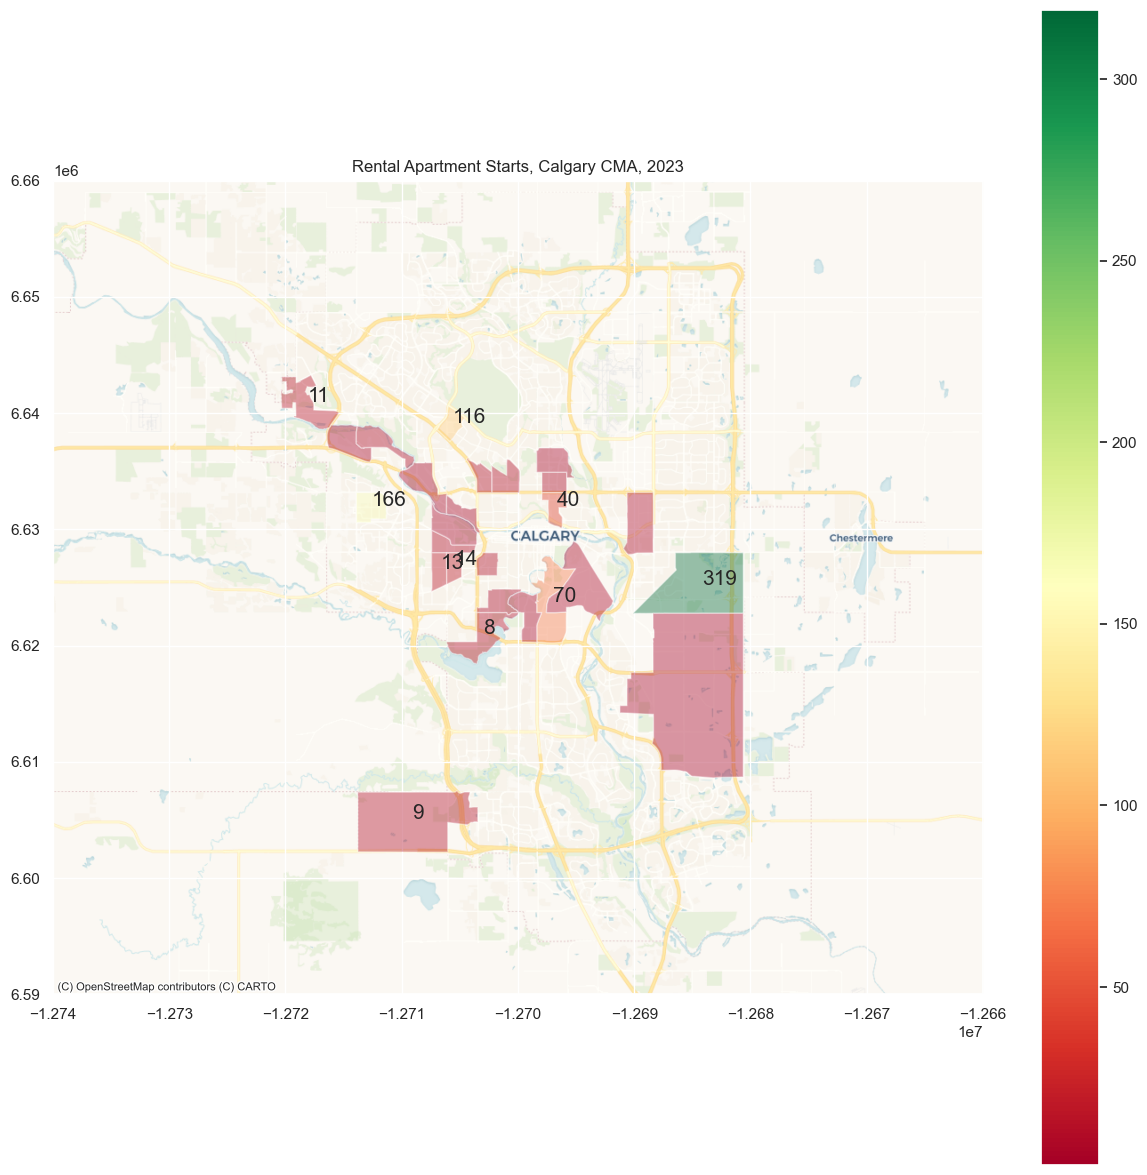

In [47]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Rental Apartment Starts, Calgary CMA, 2023')
merged_starts.to_crs(epsg='3857').plot(column='total_starts',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['total_starts']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points",fontsize = 15)
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.CartoDB.Voyager)
#cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('rental_starts.png',facecolor='white',transparent=False,dpi=300)

In [57]:
ct_condo = starts_ct_q[(starts_ct_q['dweltype']=='Apartment') & (starts_ct_q['mkttycd']=='Condo')]
merged_starts = cal_ct.merge(ct_condo[ct_condo['year']=='2023'].groupby('full_ct').sum()[['total_starts','num_structures']],left_on='CTUID',right_on='full_ct')
merged_starts=merged_starts.to_crs(epsg='3857')
top_five = merged_starts.sort_values(by="total_starts",ascending=False)[:10]

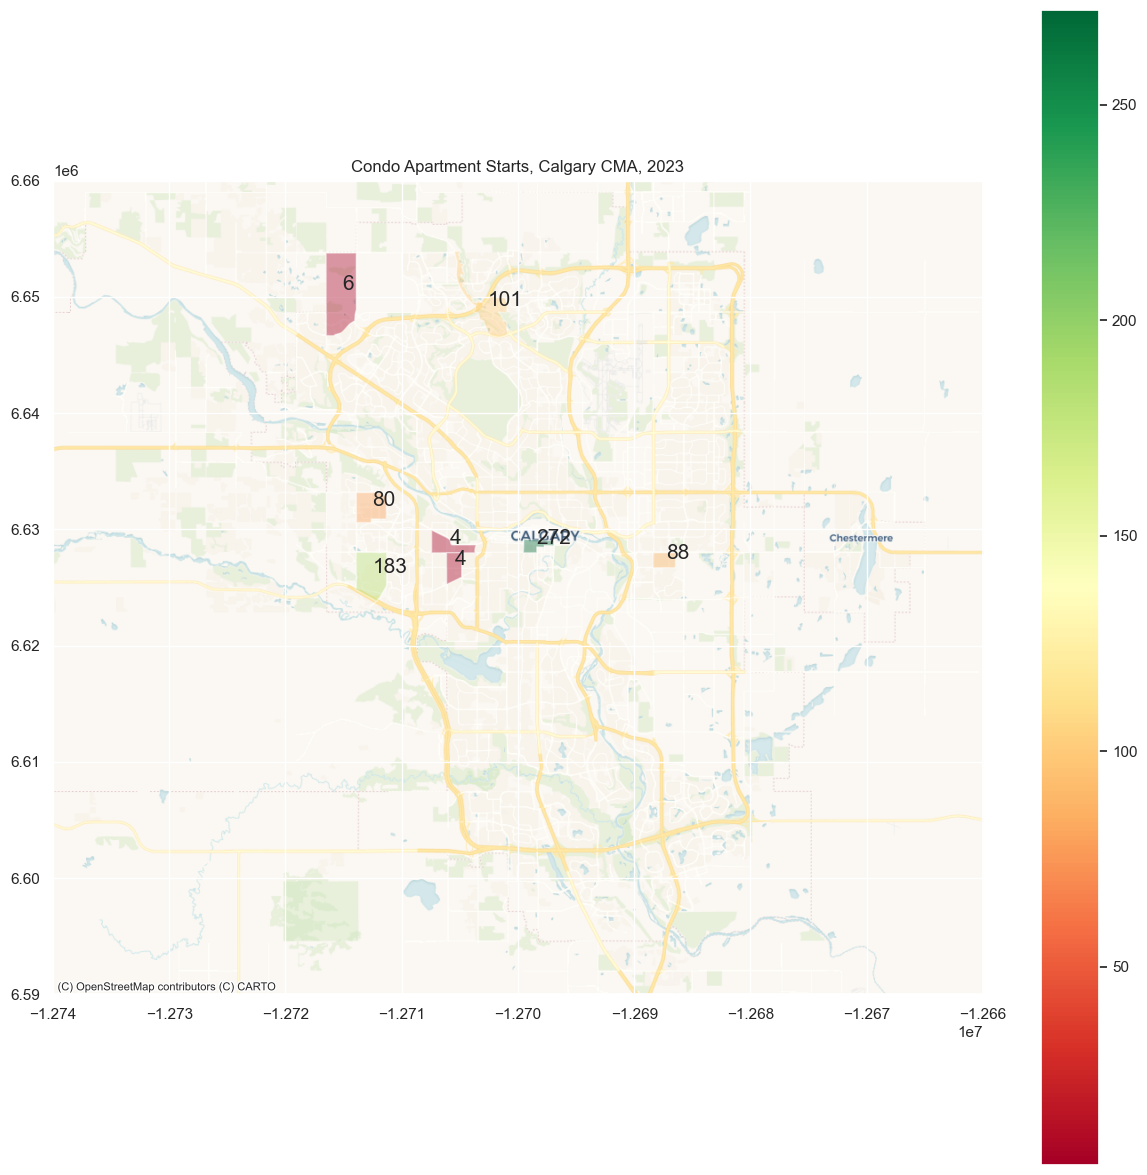

In [58]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Condo Apartment Starts, Calgary CMA, 2023')
merged_starts.to_crs(epsg='3857').plot(column='total_starts',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['total_starts']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points",fontsize = 15)
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.CartoDB.Voyager)
#cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('condo_starts.png',facecolor='white',transparent=False,dpi=300)

In [55]:
ct_row = starts_ct_q[(starts_ct_q['dweltype']=='Row/Townhouse')]
merged_starts = cal_ct.merge(ct_row[ct_row['year']=='2023'].groupby('full_ct').sum()[['total_starts','num_structures']],left_on='CTUID',right_on='full_ct')
merged_starts=merged_starts.to_crs(epsg='3857')
top_five = merged_starts.sort_values(by="total_starts",ascending=False)[:10]

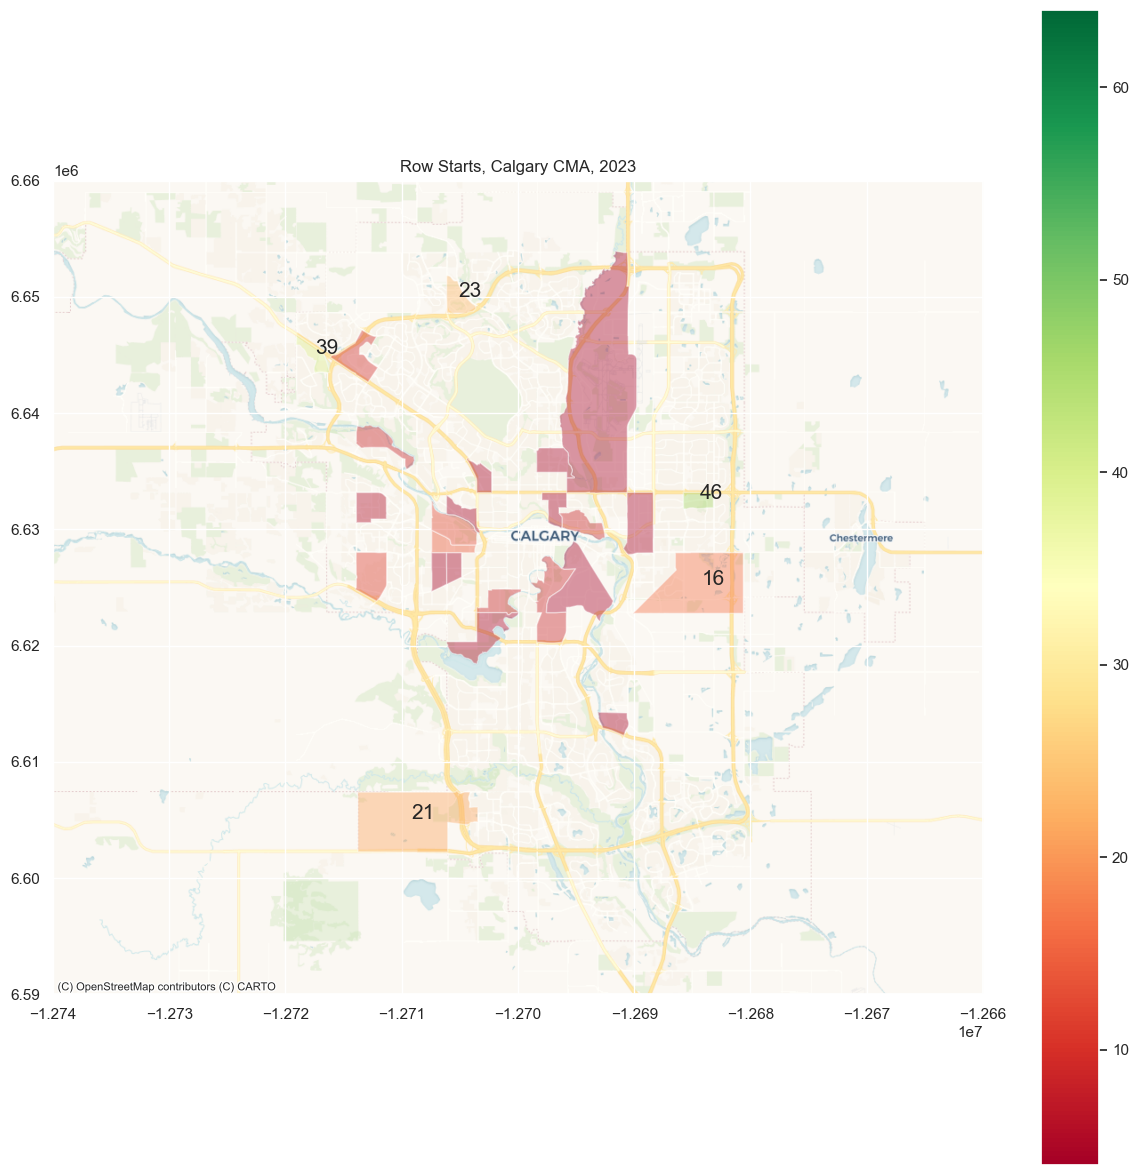

In [56]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Row Starts, Calgary CMA, 2023')
merged_starts.to_crs(epsg='3857').plot(column='total_starts',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['total_starts']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points",fontsize = 15)
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.CartoDB.Voyager)
#cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('row_starts.png',facecolor='white',transparent=False,dpi=300)